In [1]:
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn.cluster import KMeans

In [2]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J29B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/fastq/J29_B_CE_IonXpress_005.fastq")

expected = list(SeqIO.parse(path, "fasta"))
    
from Bio import Align
aligner = Align.PairwiseAligner()
aligner.mode = 'global'

aligner.match_score = 1
aligner.mismatch_score = 0
aligner.open_gap_score = 0
aligner.extend_gap_score = 0
aligner.target_end_gap_score = 0
aligner.query_end_gap_score = 0

#print(aligner.query_end_gap_score)


expAlign1 = aligner.align(expected[0].seq,expected[1].seq)
print("JELEN 5-6 = ",249-expAlign1[0].score, "Number of alignments: %d" % len(expAlign1))
expAlign2 = aligner.align(expected[1].seq,expected[2].seq)
print("JELEN 6-7 = ",249-expAlign2[0].score, "Number of alignments: %d" % len(expAlign2))
expAlign3 = aligner.align(expected[0].seq,expected[2].seq)
print("JELEN 5-7 = ",249-expAlign3[0].score, "Number of alignments: %d" % len(expAlign3))

data = list(SeqIO.parse(pathFASTQ, "fastq"))



JELEN 5-6 =  12.0 Number of alignments: 359424
JELEN 6-7 =  22.0 Number of alignments: 564013891584
JELEN 5-7 =  24.0 Number of alignments: 3530674667520


In [3]:
sizedReadings = []

for dataDistances in data:
    if(len(dataDistances.seq)==296):
        sizedReadings.append(dataDistances.seq[27:-20])
df = DataFrame(np.zeros((len(sizedReadings)+3, len(sizedReadings))))

for i in range(0, len(sizedReadings)):
    for j in range(i, len(sizedReadings)):
        distance = aligner.align(sizedReadings[i], sizedReadings[j]).score
        df[i][j] = distance
        df[j][i] = distance
print(df)

       0      1      2      3      4      5      6      7      8      9    \
0    249.0  246.0  247.0  235.0  234.0  247.0  246.0  233.0  235.0  235.0   
1    246.0  249.0  247.0  236.0  235.0  248.0  246.0  234.0  236.0  236.0   
2    247.0  247.0  249.0  236.0  235.0  248.0  247.0  234.0  236.0  236.0   
3    235.0  236.0  236.0  249.0  248.0  237.0  235.0  247.0  249.0  249.0   
4    234.0  235.0  235.0  248.0  249.0  236.0  234.0  247.0  248.0  248.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
836  235.0  236.0  236.0  249.0  248.0  237.0  235.0  247.0  249.0  249.0   
837  235.0  235.0  237.0  248.0  247.0  236.0  235.0  246.0  248.0  248.0   
838    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
839    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
840    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

     ...    828    829    830    831    832    833    834    835    836    

In [4]:
for i in range(0, len(sizedReadings)):
    df[i][len(sizedReadings)] = aligner.align(expected[0].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+1] = aligner.align(expected[1].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+2] = aligner.align(expected[2].seq, sizedReadings[i]).score

print(df)
    
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])


       0      1      2      3      4      5      6      7      8      9    \
0    249.0  246.0  247.0  235.0  234.0  247.0  246.0  233.0  235.0  235.0   
1    246.0  249.0  247.0  236.0  235.0  248.0  246.0  234.0  236.0  236.0   
2    247.0  247.0  249.0  236.0  235.0  248.0  247.0  234.0  236.0  236.0   
3    235.0  236.0  236.0  249.0  248.0  237.0  235.0  247.0  249.0  249.0   
4    234.0  235.0  235.0  248.0  249.0  236.0  234.0  247.0  248.0  248.0   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
836  235.0  236.0  236.0  249.0  248.0  237.0  235.0  247.0  249.0  249.0   
837  235.0  235.0  237.0  248.0  247.0  236.0  235.0  246.0  248.0  248.0   
838  235.0  236.0  236.0  249.0  248.0  237.0  235.0  247.0  249.0  249.0   
839  247.0  248.0  248.0  237.0  236.0  249.0  247.0  235.0  237.0  237.0   
840  226.0  226.0  226.0  225.0  224.0  227.0  225.0  223.0  225.0  225.0   

     ...    828    829    830    831    832    833    834    835    836    

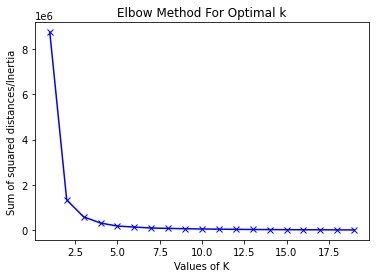

In [5]:
K = range(1,20)
Sum_of_squared_distance = []
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(principalDf)
 Sum_of_squared_distance.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

            PC1        PC2
838  -35.616970  -0.932953
839  300.900761 -59.033795
840  633.348033  87.368976
-35.61697024750582 -0.9329533131764165
300.90076078017916 -59.03379490868715
633.348032960526 87.3689762143171


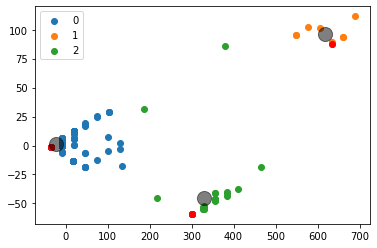

In [6]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(principalDf)
#print(label)

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalComponents[label == i , 0] , principalComponents[label == i , 1] , label = i)


df2 = pd.DataFrame(data=principalDf.tail(3))
print(df2)
for i in range(0,len(df2)):
    print(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'])
    plt.scatter(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'], color='red')

    
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.legend()
plt.show()

In [7]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J30B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/fastq/J30_B_CE_IonXpress_006.fastq")

expected = list(SeqIO.parse(path, "fasta"))
    
from Bio import Align
aligner = Align.PairwiseAligner()
aligner.mode = 'global'

aligner.match_score = 1
aligner.mismatch_score = 0
aligner.open_gap_score = 0
aligner.extend_gap_score = 0
aligner.target_end_gap_score = 0
aligner.query_end_gap_score = 0

#print(aligner.query_end_gap_score)


expAlign1 = aligner.align(expected[0].seq,expected[1].seq)
print("JELEN 5-6 = ",249-expAlign1[0].score, "Number of alignments: %d" % len(expAlign1))
expAlign2 = aligner.align(expected[1].seq,expected[2].seq)
print("JELEN 6-7 = ",249-expAlign2[0].score, "Number of alignments: %d" % len(expAlign2))
expAlign3 = aligner.align(expected[0].seq,expected[2].seq)
print("JELEN 5-7 = ",249-expAlign3[0].score, "Number of alignments: %d" % len(expAlign3))

data = list(SeqIO.parse(pathFASTQ, "fastq"))



JELEN 5-6 =  24.0 Number of alignments: 28414623744000
JELEN 6-7 =  29.0 Number of alignments: 9441232316006400
JELEN 5-7 =  20.0 Number of alignments: 566658892800


In [8]:
sizedReadings = []

for dataDistances in data:
    if(len(dataDistances.seq)==296):
        sizedReadings.append(dataDistances.seq[27:-20])
df = DataFrame(np.zeros((len(sizedReadings)+3, len(sizedReadings))))

for i in range(0, len(sizedReadings)):
    for j in range(i, len(sizedReadings)):
        distance = aligner.align(sizedReadings[i], sizedReadings[j]).score
        df[i][j] = distance
        df[j][i] = distance
print(df)

       0      1      2      3      4      5      6      7      8      9     \
0     249.0  237.0  224.0  248.0  246.0  223.0  224.0  247.0  248.0  248.0   
1     237.0  249.0  232.0  238.0  235.0  231.0  232.0  238.0  238.0  238.0   
2     224.0  232.0  249.0  225.0  223.0  247.0  249.0  225.0  225.0  225.0   
3     248.0  238.0  225.0  249.0  246.0  224.0  225.0  248.0  249.0  249.0   
4     246.0  235.0  223.0  246.0  249.0  222.0  223.0  245.0  246.0  246.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1142  224.0  232.0  249.0  225.0  223.0  247.0  249.0  225.0  225.0  225.0   
1143  224.0  232.0  248.0  225.0  223.0  248.0  248.0  225.0  225.0  225.0   
1144    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1145    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1146    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...   1134   1135   1136   1137   1138   1139   1140   11

In [9]:
for i in range(0, len(sizedReadings)):
    df[i][len(sizedReadings)] = aligner.align(expected[0].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+1] = aligner.align(expected[1].seq, sizedReadings[i]).score
    df[i][len(sizedReadings)+2] = aligner.align(expected[2].seq, sizedReadings[i]).score

print(df)
    
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])


       0      1      2      3      4      5      6      7      8      9     \
0     249.0  237.0  224.0  248.0  246.0  223.0  224.0  247.0  248.0  248.0   
1     237.0  249.0  232.0  238.0  235.0  231.0  232.0  238.0  238.0  238.0   
2     224.0  232.0  249.0  225.0  223.0  247.0  249.0  225.0  225.0  225.0   
3     248.0  238.0  225.0  249.0  246.0  224.0  225.0  248.0  249.0  249.0   
4     246.0  235.0  223.0  246.0  249.0  222.0  223.0  245.0  246.0  246.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1142  224.0  232.0  249.0  225.0  223.0  247.0  249.0  225.0  225.0  225.0   
1143  224.0  232.0  248.0  225.0  223.0  248.0  248.0  225.0  225.0  225.0   
1144  248.0  238.0  225.0  249.0  246.0  224.0  225.0  248.0  249.0  249.0   
1145  224.0  232.0  249.0  225.0  223.0  247.0  249.0  225.0  225.0  225.0   
1146  228.0  221.0  220.0  229.0  226.0  219.0  220.0  230.0  229.0  229.0   

      ...   1134   1135   1136   1137   1138   1139   1140   11

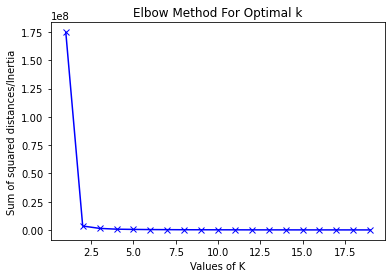

In [10]:
K = range(1,20)
Sum_of_squared_distance = []
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(principalDf)
 Sum_of_squared_distance.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

             PC1         PC2
1144 -347.705561  -14.000555
1145  446.174265  -11.989811
1146  -39.883219  401.821978
-347.7055612092174 -14.000555122291624
446.1742653197898 -11.989811170817784
-39.88321869538143 401.82197819034576


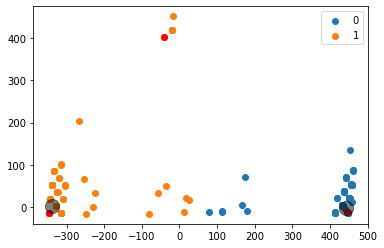

In [11]:
#Initialize the class object
kmeans = KMeans(n_clusters= 2)
 
#predict the labels of clusters.
label = kmeans.fit_predict(principalDf)
#print(label)

#Getting unique labels
 
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(principalComponents[label == i , 0] , principalComponents[label == i , 1] , label = i)


df2 = pd.DataFrame(data=principalDf.tail(3))
print(df2)
for i in range(0,len(df2)):
    print(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'])
    plt.scatter(df2.iloc[i]['PC1'], df2.iloc[i]['PC2'], color='red')

    
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

plt.legend()
plt.show()